loaded 20 images


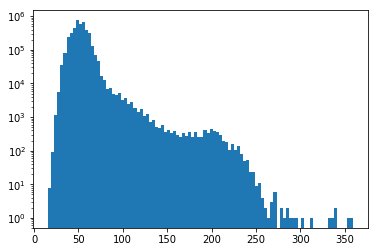

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import itertools
from PIL import Image
from scipy.stats import logistic


# Name of the hdf file that contain the data we need
f_name = 'sxro6416-r0504.h5'

# Open the hdf5 file, use the path to the images to extrate the data and place
# it in the image data object for further manipulation and inspection.
datafile = h5py.File(f_name, 'r')
image_data = []
for i in itertools.count(start=0):
    d = datafile.get(f'Configure:0000/Run:0000/CalibCycle:{i:04d}/Princeton::FrameV2/SxrEndstation.0:Princeton.0/data')
    if d is not None:
        # actual image is at first index
        image_data.append(d[0])
    else:
        break

#print(image_data[1])
# Tell me how many images were contained in the datafile
print(f"loaded {len(image_data)} images")


#for i in range(20):
    #plt.imshow(image_data[i])
    #plt.savefig('image'+str(i)+'.png',dpi=1000)
    #image = Image.fromarray(image_data[i]).convert("L")
    #image.save("image"+str(i)+".png")

# Plot a good dataset - here index 8 (but there are others too!)
#misc.imshow(image_data[0])
#misc.show()

#image = Image.fromarray(image_data[0]).convert("L")
#image.save("out.png")

# The histogram of the data will help show possible single photon hits
plt.hist(image_data[1].flatten(), bins=100)
plt.yscale('log')


In [21]:
dat=image_data[1]
dat.shape

(2048, 2048)

In [11]:
import csv

In [15]:
#with open('dat.csv', 'w', newline='') as f:
  #writer = csv.writer(f)
  #writer.writerows(dat)

In [28]:
#calculate the mode of the data, which is to be subtracted from the dataset so as to make the Gaussian noise have a mean of 0.
import statistics
dat_mode=statistics.mode(dat.flatten())

dat2=dat.astype(int)-dat_mode

In [66]:
dat_mode

50

In [58]:
#Define the distribution function of single photon events.

#Here, such distribution is modeled as Gaussian. Later this will be justified/replaced with more justified forms based on literatures
#and/or physical simulations

def dist_f_gaussian(x,y,x0,y0,s1,s2,A,t,cutoff=2):
    x1=(x-x0)*np.cos(t)-(y-y0)*np.sin(t)
    y1=(x-x0)*np.sin(t)+(y-y0)*np.cos(t)
    print(x1,y1)
    if(x1>=cutoff*s1 or y1>=cutoff*s2):
        return 0
    else:
        return A*np.exp(-x1**2/(2*s1**2)-y1**2/(2*s2**2))

#With respect to this distribution, we create a class of single photon events(CPE):

class 

In [65]:
#Define the loss function. 

3.0 0.0


0